In [1]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from PIL import Image
from pathlib import Path
from image_dataset import ImageDataset

/Users/alexraudvee/Desktop/TU_e/year_2/Q3Y2_Data_challenge_1/JBG040-Group15/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_dataset = ImageDataset(Path("../../data/X_train.npy"), 
                             Path("../../data/Y_train.npy"))

In [3]:
labeled_targets = []
class_names = ['Atelectasis', 'Effusion', 'Infiltration', 'Healthy', 'Nodule', 'Pneumothorax']
for i in train_dataset.targets:
    labeled_targets.append(class_names[i])

In [4]:
fig = px.histogram(labeled_targets)
fig.update_layout(bargap=0.2)
fig.show()

In [5]:
# 17, 71,146, 130, 116, 112, 187,  186, 152, 235, 228, 217, 290, 279 (rofl), 261 (rofl), 476 (rofl),
# 384 (no lungs but the digestive system), 325 (half of lungs on the image only), 499, 496,  

In [6]:
def normalize_image(image):
    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))
    
    return normalized_image

In [7]:
normalized = normalize_image(train_dataset.imgs[11090][0])

In [8]:
clahe = cv2.createCLAHE(clipLimit=4, tileGridSize=(8,8))
cl1 = clahe.apply(train_dataset.imgs[261][0])

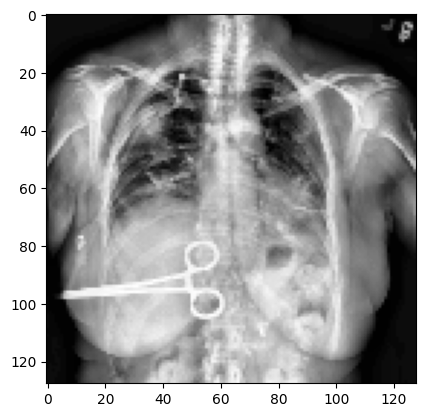

In [9]:
plt.imshow(cl1, cmap = 'gray')

Text(0.5, 1.0, 'Original image')

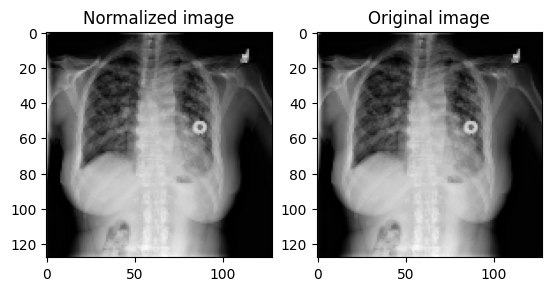

In [10]:
plt.subplot(1, 2, 1)
plt.imshow(normalized, cmap = 'gray')
plt.title('Normalized image')

plt.subplot(1, 2, 2)
plt.imshow(train_dataset.imgs[11090][0], cmap = 'gray')
plt.title('Original image')

Healthy


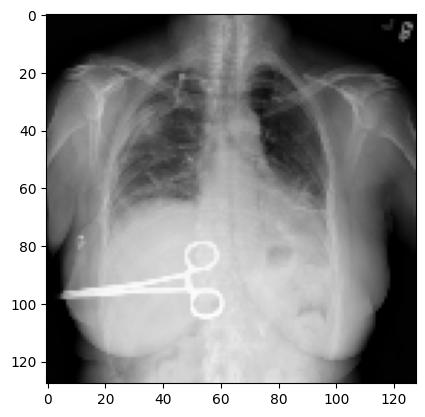

In [11]:
print(class_names[train_dataset.targets[261]])
plt.imshow(train_dataset.imgs[261][0], cmap = 'gray')

In [12]:
fig = px.histogram(train_dataset.imgs[152][0].flatten(), nbins = 256)
fig.update_layout(bargap=0.2)
fig.show()

In [13]:
fig = px.histogram(train_dataset.imgs[14566][0].flatten(), nbins = 256)
fig.update_layout(bargap=0.2)
fig.show()

In [14]:
image = train_dataset.imgs[4708][0]
height = image.shape[0]
print(height)

top_half = image.T[:len(image) // 2, :]
bottom_half = image.T[len(image) // 2:, :]

128


In [15]:
mean_intensity_top = np.median(top_half)
mean_intensity_bottom = np.median(bottom_half)
print('top', mean_intensity_top)
print('bot', mean_intensity_bottom)

top 164.0
bot 160.0


In [16]:

height = train_dataset.imgs[23][0].shape[0]

top_half = train_dataset.imgs[23][0][:height // 2, :]
bottom_half = train_dataset.imgs[23][0][height // 2:, :]

mean_intensity_top = np.median(top_half)
mean_intensity_bottom = np.median(bottom_half)
print(mean_intensity_bottom, mean_intensity_top)

120.0 103.0


In [17]:
def is_inverted(image):

    height = image.shape[0]

    top_half = image[:height // 2, :]
    bottom_half = image[height // 2:, :]

    median_intensity_top = np.median(top_half)
    median_intensity_bottom = np.median(bottom_half)

    return median_intensity_top > median_intensity_bottom

In [18]:
is_inverted(train_dataset.imgs[23][0])

False

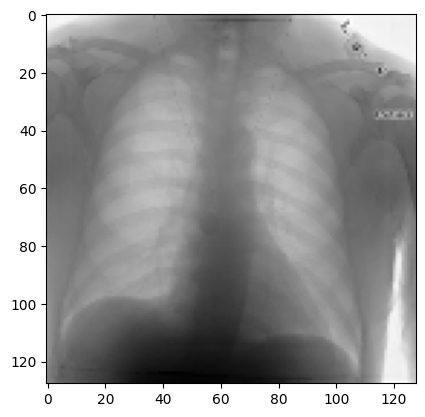

In [19]:
plt.imshow(train_dataset.imgs[14566][0], cmap= 'gray')

In [20]:
inverted_images = []
for i in range(len(train_dataset.imgs)):
    if is_inverted(train_dataset.imgs[i][0]) == True:
        inverted_images.append(i)

In [21]:
print(len(inverted_images))

605


In [22]:
len(train_dataset.imgs)

16841

In [23]:
len(inverted_images)

605

In [24]:
train_dataset.imgs[23][0]

array([[ 63,  35,  20, ..., 119, 124, 131],
       [ 57,  31,  16, ...,  48,  54,  75],
       [ 56,  30,  15, ...,  18,  22,  41],
       ...,
       [ 10,   9,   9, ...,  26,  51,  96],
       [ 16,  15,  15, ...,  26,  52,  97],
       [ 24,  24,  24, ...,  27,  53,  98]], dtype=uint8)

In [25]:
min(inverted_images[10:20])
min(inverted_images[10:20]), len(inverted_images[10:20])

(251, 10)

In [26]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl1 = clahe.apply(train_dataset.imgs[13362][0])
# plt.imshow(cl1, cmap = 'gray')

In [27]:
# for i in diffs[200:]:
#     print(f'The image number is {i}')
#     plt.imshow(train_dataset.imgs[i][0], cmap = 'gray')
#     # plt.title(labeled_targets[inverted_images[i]])
#     plt.show()

Text(0.5, 1.0, 'Pneumothorax')

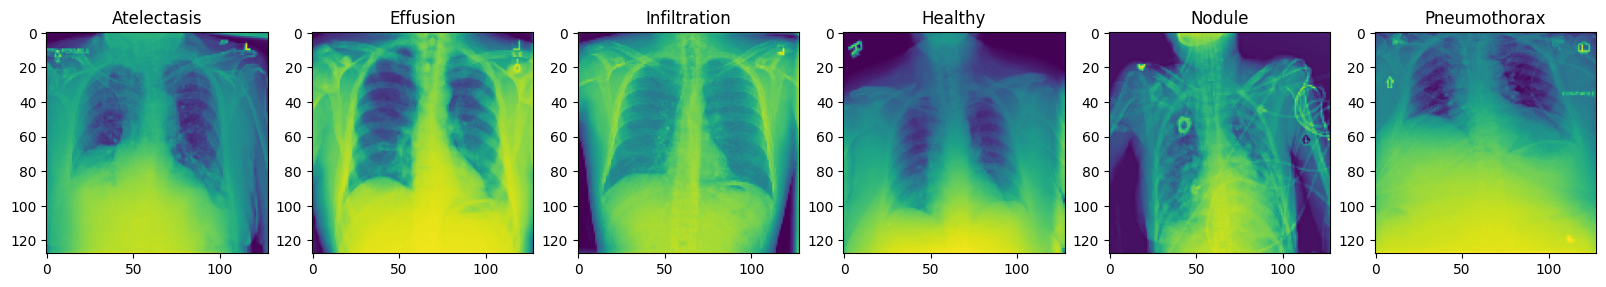

In [28]:
fig = plt.figure(figsize = (20, 20))
plt.subplot(1, 6, 1)
plt.imshow(train_dataset.imgs[11][0])
plt.title(labeled_targets[11])

plt.subplot(1, 6, 2)
plt.imshow(train_dataset.imgs[6][0])
plt.title(labeled_targets[6])

plt.subplot(1, 6, 3)
plt.imshow(train_dataset.imgs[10][0])
plt.title(labeled_targets[10])

plt.subplot(1, 6, 4)
plt.imshow(train_dataset.imgs[0][0])
plt.title(labeled_targets[0])

plt.subplot(1, 6, 5)
plt.imshow(train_dataset.imgs[26][0])
plt.title(labeled_targets[26])

plt.subplot(1, 6, 6)
plt.imshow(train_dataset.imgs[9][0])
plt.title(labeled_targets[9])